To run plotly/widgets in jupyterlab:
``` shell
pip install jupyterlab "ipywidgets>=7.5"
curl -fsSL https://deb.nodesource.com/setup_16.x | sudo -E bash -
sudo apt-get install -y nodejs
jupyter labextension install jupyterlab-plotly@4.14.3
```

# Unavailable Space testing Testing

### Imports

In [2]:
import plotly.graph_objects as go
import numpy as np

from willitfit.plotting import plotter
from willitfit.params import VOL_UNAVAILABLE, VOL_EMPTY

## Helper Functions

In [52]:
def get_volume_space(car_model, data, ratio_height=0.5, slant=1):
    """
    Returns available volume for a specific car_model.
    Use ratio_door to tweak estimated unavailable space caused by 45-degree trunk-door slope.
    """
    # Isolate dimension cols
    dim_cols = ['depth', 'width', 'height']

    # Trunk dimensions
    model_row = data[data['car_model'] == car_model]
    trunk_dims = model_row[dim_cols].to_numpy(int)[0]

    # Cuboid Volume Space
    volume_space = np.full(trunk_dims, VOL_EMPTY, dtype=int)

    # Unavailable space
    height_block = int(trunk_dims[2]*ratio_height)
    print(height_block)
    for i in range(height_block):
        volume_space[trunk_dims[0]-(i+1),:,height_block+(slant*i):] = VOL_UNAVAILABLE
    return volume_space


def test_unavailable_space(car_model, data, ratio_height, slant):
    test_vol = get_volume_space(car_model=car_model, data=data, ratio_height=ratio_height, slant=slant)

    return plotter.plot_all(test_vol, plot_unavailable=True)

# Test

In [3]:
import pandas as pd
import os
from pathlib import Path

In [14]:
CSV_PATH = Path(os.path.abspath(os.getcwd())).parent.absolute()/"willitfit/data/cars_clean.csv"
print(CSV_PATH)

/home/dominik/code/domzae/willitfit/willitfit/data/cars_clean.csv


In [56]:
data = pd.read_csv(CSV_PATH)
car_model = data.iloc[5]['car_model']

37


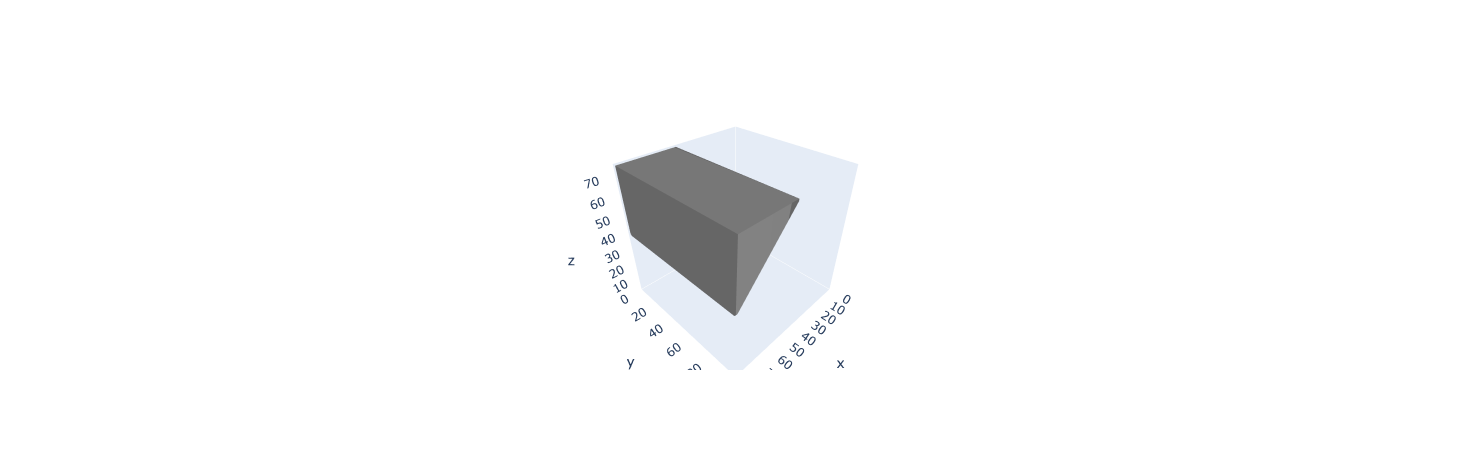

In [57]:
test_unavailable_space(car_model, data, 0.5, 1)

In [48]:
x = np.array([[ [1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]],

               [[10, 11, 12],
                [13, 14, 15],
                [16, 17, 18]],

               [[19, 20, 21],
                [22, 23, 24],
                [25, 26, 27]]])

In [49]:
x[0,:,]

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24],
        [25, 26, 27]]])

In [7]:
p = np.zeros((5,5,5))

In [8]:
print(p)

[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]


In [9]:
p[2,:,2] = 1

In [11]:
p[2,2,:] = 1

In [13]:
p[:,2,2] = 1

In [14]:
p

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 1., 1., 1., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

In [20]:
np.diff(p[1:5:,1:5:,1:5],1)

array([[[ 0.,  0.,  0.],
        [ 1., -1.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 1., -1.,  0.],
        [ 0.,  0.,  0.],
        [ 1., -1.,  0.],
        [ 1., -1.,  0.]],

       [[ 0.,  0.,  0.],
        [ 1., -1.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 1., -1.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]])

In [25]:
np.diff(p,1,axis=-1,append=0)

array([[[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  1., -1.,  0.,  0.],
        [ 0.,  1., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.],
        [ 0.,  1., -1.,  0.,  0.],
        [ 0.,  1., -1.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]]])

In [34]:
from scipy.ndimage import gaussian_filter, binary_erosion

In [43]:
gaussian_filter(p,0.13)

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 2.00494130e-26, 1.41595950e-13, 2.00494130e-26,
         0.00000000e+00],
        [0.00000000e+00, 1.41595950e-13, 1.00000000e+00, 1.41595950e-13,
         0.00000000e+00],
        [0.00000000e+00, 2.00494130e-26, 1.41595950e-13, 2.00494130e-26,
         0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]],

       [[0.00000000e+00, 2.00494130e-26, 1.41595950e-13, 2.00494130e-26,
         0.00000000e+00],
        [2.00494130e-26, 6.01482391e-26, 2.83191900e-13, 6.01482391e-26,
         2.00494130e-26],
        [1.41595950e-13, 2.83191900e-13, 1.00000000e+00, 2.83191900e-13,
         1.41595950e-13],
        [2.00494130e-26, 6.01482391e-26, 2.83191900e-13, 6.01482391e-26,
         2.00494130e-26],
        [0.00000000e+00, 2.00494130e-26, 1.41595950e-13, 2.00494130e-26,
         0.00000000e+00]],

      

In [35]:
binary_erosion(p)

array([[[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]],

       [[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]],

       [[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]],

       [[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]],

       [[False, False, False, False, False],
        [False, False, False, False, False],
  